### In this Kernel we Process the results

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
%matplotlib inline  
path_clinicalVolume= "/Users/farnoosh/Projects/DeepCINET/Data/OPC/Result/ClinicalVolume/"
path_clinicOnly = "/Users/farnoosh/Projects/DeepCINET/Data/OPC/Result/ClinicOnly/"



In [2]:
clinicalVolume = pd.read_csv(path_clinicalVolume +"result.csv")
clinicOnly = pd.read_csv(path_clinicOnly +"result.csv")



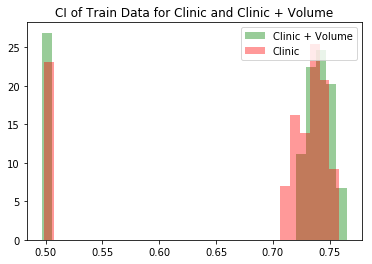

In [3]:
n, bins, patches = plt.hist(clinicalVolume.train, 30, density=True, facecolor='g', alpha=0.4, label = 'Clinic + Volume')
n, bins, patches = plt.hist(clinicOnly.train, 30, density=True, facecolor='r', alpha=0.4, label = 'Clinic')

plt.title('CI of Train Data for Clinic and Clinic + Volume')


plt.legend(loc='upper right')
plt.show()

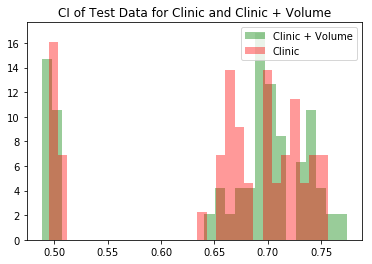

In [5]:
n, bins, patches = plt.hist(clinicalVolume.test, 30, density=True, facecolor='g', alpha=0.4, label = 'Clinic + Volume')
n, bins, patches = plt.hist(clinicOnly.test, 30, density=True, facecolor='r', alpha=0.4, label = 'Clinic')
plt.title('CI of Test Data for Clinic and Clinic + Volume')


plt.legend(loc='upper right')
plt.show()

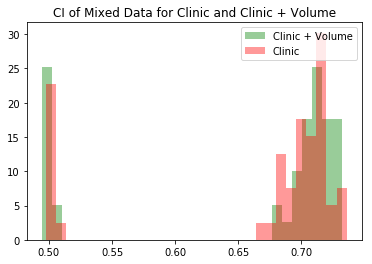

In [6]:
n, bins, patches = plt.hist(clinicalVolume.mixed, 30, density=True, facecolor='g', alpha=0.4, label = 'Clinic + Volume')
n, bins, patches = plt.hist(clinicOnly.mixed, 30, density=True, facecolor='r', alpha=0.4, label = 'Clinic')

plt.title('CI of Mixed Data for Clinic and Clinic + Volume')
plt.legend(loc='upper right')
plt.show()

In [44]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('Scenario','LMP', data=df, ax = axes)
axes.set_title('Day Ahead Market')

axes.yaxis.grid(True)
axes.set_xlabel('Scenario')
axes.set_ylabel('LMP ($/MWh)')

plt.show()

,Unnamed: 0,train,test,mixed,random state,number
6,c_index,0.499194,0.502552,0.499134,38,6


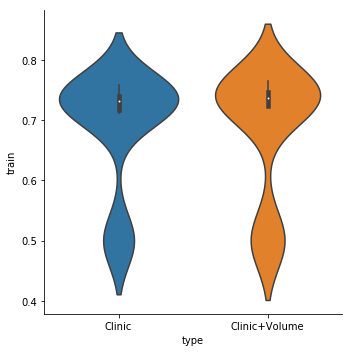

In [35]:
clinicOnly["type"] = "Clinic"
clinicalVolume["type"] = "Clinic+Volume"
result = pd.concat([clinicOnly, clinicalVolume], keys=['x', 'y'])

sns.catplot(x="type", y="train", kind="violin", dodge=False, data=result);
#sns.catplot(x="type", y="train", hue="test", kind="violin", split=True, data=result);

# Start Clinic_withoutCategorical



In [38]:
path_Clinic_withoutCategorical= "/Users/farnoosh/Projects/DeepCINET/Data/OPC/Result/Clinic_withoutCategorical/"
path_Clinic_Volume_withoutCategorical= "/Users/farnoosh/Projects/DeepCINET/Data/OPC/Result/Clinic_Volume_withoutCategorical/"
path_Volume= "/"
clinicOnly_Cat = pd.read_csv(path_Clinic_withoutCategorical +"result.csv")
clinicVolume_Cat = pd.read_csv(path_Clinic_Volume_withoutCategorical +"result.csv")


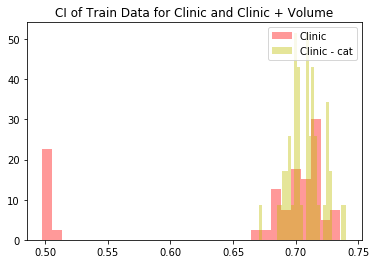

In [30]:
#n, bins, patches = plt.hist(clinicalVolume.train, 30, density=True, facecolor='g', alpha=0.4, label = 'Clinic + Volume')
n, bins, patches = plt.hist(clinicOnly.mixed, 30, density=True, facecolor='r', alpha=0.4, label = 'Clinic')
n, bins, patches = plt.hist(clinicOnly_Cat.mixed, 30, density=True, facecolor='y', alpha=0.4, label = 'Clinic - cat')

plt.title('CI of Train Data for Clinic and Clinic + Volume')


plt.legend(loc='upper right')
plt.show()


Text(0.5,1,'CI of Train Data for Clinic and Clinic + Volume')

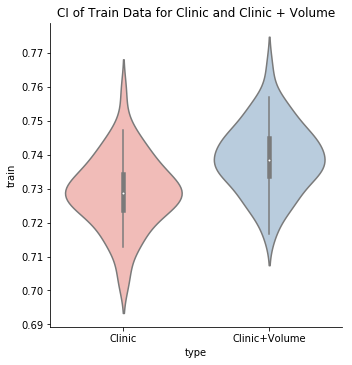

In [73]:

clinicOnly_Cat["type"] = "Clinic"
clinicVolume_Cat["type"] = "Clinic+Volume"
result = pd.concat([clinicOnly_Cat, clinicVolume_Cat], keys=['x', 'y'])

g = sns.catplot(x="type", y="train", kind="violin",  data=result,  palette="Pastel1")
plt.title('CI of Train Data for Clinic and Clinic + Volume')


Text(0.5,1,'CI of Mixed Data for Clinic and Clinic + Volume')

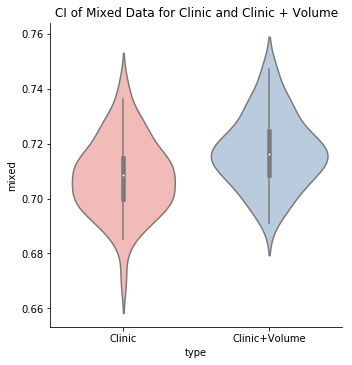

In [74]:
sns.catplot(x="type", y="mixed", kind="violin", data=result, palette="Pastel1");
plt.title('CI of Mixed Data for Clinic and Clinic + Volume')


Text(0.5,1,'CI of Test Data for Clinic and Clinic + Volume')

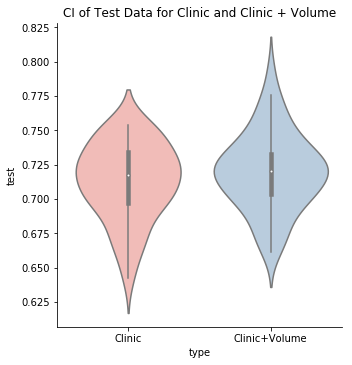

In [77]:
sns.catplot(x="type", y="test", kind="violin", data=result,  palette="Pastel1");
plt.title('CI of Test Data for Clinic and Clinic + Volume')



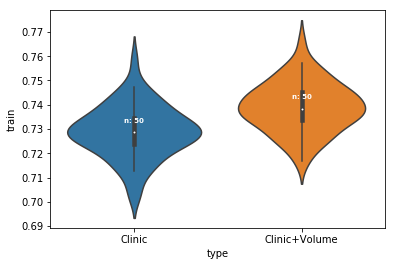

In [68]:
import seaborn as sns, numpy as np
import seaborn as sns, numpy as np
df = result
 
# Basic violinplot
ax = sns.violinplot( x="type", y="train", kind="violin",  data=result)

# Calculate number of obs per group & median to position labels
medians = df.groupby(['type'])['train'].median().values
nobs = df['type'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.004, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')
 
#sns.plt.show()

